<a href="https://colab.research.google.com/github/PuruBhatnagar1197/ABtesting/blob/main/Optimistic_initial_value_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_of_exp=10000
eps=0.05
bandit_true_probab=[0.2,0.5,0.7]

In [3]:
class BanditArm:
    def __init__(self,p):
        self.p=p
        self.p_estimate=5
        self.N=1
    def pull(self):
        return np.random.randn()<self.p
    def update(self,x):
        self.N+=1
        self.p_estimate=((self.N-1)*self.p_estimate+x)/self.N

In [7]:
def experiment():
    bandit=[BanditArm(p) for p in bandit_true_probab]
    reward=np.zeros(num_of_exp)
    for i in range (num_of_exp):
        j=np.argmax([b.p_estimate for b in bandit])

        x=bandit[j].pull()
        reward[i]=x
        bandit[j].update(x)

    for b in bandit:
        print("estimated_params: ", b.p_estimate)
    print("total reward earned:", reward.sum())
    print("overall win rate:", reward.sum() / num_of_exp)
    print("number of trials in badit: ", [b.N for b in bandit])
    cumulative_rewards = np.cumsum(reward)
    win_rates = cumulative_rewards / (np.arange(num_of_exp) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(num_of_exp)*np.max(bandit_true_probab))
    plt.show()




estimated_params:  0.7272727272727273
estimated_params:  0.7380952380952381
estimated_params:  0.754029008863817
total reward earned: 7526.0
overall win rate: 0.7526
number of trials in badit:  [33, 42, 9928]


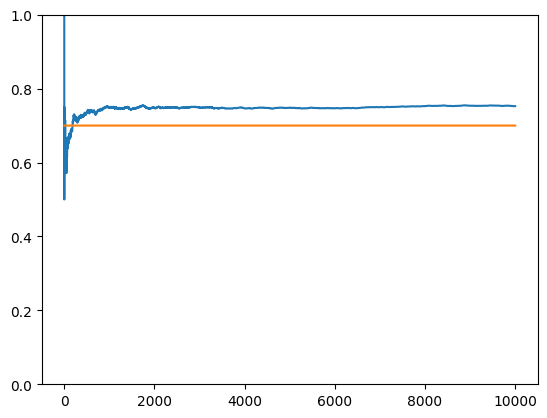

In [8]:
experiment()